In [4]:
from google.colab import files

files.upload()

Saving input_2.pkl to input_2.pkl
Saving roots_2.pkl to roots_2.pkl


In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import LSTM, RepeatVector, Dense, Dropout

In [79]:
X = pd.read_pickle('input_2.pkl')
Y = pd.read_pickle('roots_2.pkl')


print("X head")
print(X.head())

print("\nY head")
print(Y.head())


X_np = X.to_numpy()
Y_np = Y.to_numpy()


DEGREE = X_np.shape[1] - 1

x_whole = X_np[:]

x_train = X_np[:80000]
y_train = Y_np[:80000]

x_val = X_np[80000:90000]
y_val = Y_np[80000:90000]

x_test = X_np[90000:]
y_test = Y_np[90000:]


def reshape(array):
    return np.expand_dims(array, -1)

X_whole = reshape(x_whole)

X_train = reshape(x_train)
Y_train = reshape(y_train)

X_val = reshape(x_val)
Y_val = reshape(y_val)

X_test = reshape(x_test)
Y_test = reshape(y_test)

X head
         a0        a1        a2        a3        a4        a5
0  0.045836  0.099444  0.199012  0.882048  0.876404 -0.070061
1  0.153620 -0.036678 -0.097280  0.119063  0.857804 -0.579278
2 -0.917627 -0.810804  0.214693  0.451562  0.738705 -0.169980
3 -0.059165 -0.913112  0.478123  0.476287  0.705972 -0.899715
4 -0.827581  0.006353 -0.604728  0.171360  0.567436 -0.189020

Y head
   Re(alpha1)  Im(alpha1)  Re(alpha2)  ...  Im(alpha4)  Re(alpha5)  Im(alpha5)
0   -0.731739         0.0   -0.435827  ...   -0.375154    0.107998    0.375154
1    1.570826         0.0   -0.493819  ...   -0.475135    0.448815    0.475135
2   -0.802092         0.0    1.133923  ...   -1.010405   -0.438763    1.010405
3   -0.062843         0.0   -0.611819  ...   -0.263067    1.035572    0.263067
4   -1.282681         0.0    1.570212  ...   -0.867781   -0.075336    0.867781

[5 rows x 10 columns]


In [3]:
size = 128
model = Sequential()

model.add(LSTM(size, input_shape=(DEGREE+1,1)))

model.add(RepeatVector(DEGREE * 2))
model.add((LSTM(size, return_sequences=True)))
model.add(Dropout(.2))
model.add(Dense(1))

model.compile(loss='mean_absolute_error',
              optimizer='adam',
              metrics=['mae'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
repeat_vector (RepeatVector) (None, 10, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 128)           131584    
_________________________________________________________________
dropout (Dropout)            (None, 10, 128)           0         
_________________________________________________________________
dense (Dense)                (None, 10, 1)             129       
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
# 1st dataset
BATCH_SIZE = 128
model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=15, verbose=1, validation_data=(X_val, Y_val))

Epoch 1/15
625/625 [==============================] - 58s 63ms/step - loss: 1.0485 - mae: 1.0485 - val_loss: 1.1914 - val_mae: 1.1914
Epoch 2/15
625/625 [==============================] - 39s 62ms/step - loss: 1.2159 - mae: 1.2159 - val_loss: 1.0171 - val_mae: 1.0171
Epoch 3/15
625/625 [==============================] - 39s 62ms/step - loss: 1.2138 - mae: 1.2138 - val_loss: 0.9719 - val_mae: 0.9719
Epoch 4/15
625/625 [==============================] - 39s 63ms/step - loss: 0.9039 - mae: 0.9039 - val_loss: 0.8729 - val_mae: 0.8729
Epoch 5/15
625/625 [==============================] - 39s 62ms/step - loss: 0.7605 - mae: 0.7605 - val_loss: 0.7943 - val_mae: 0.7943
Epoch 6/15
625/625 [==============================] - 39s 62ms/step - loss: 0.8793 - mae: 0.8793 - val_loss: 0.7689 - val_mae: 0.7689
Epoch 7/15
625/625 [==============================] - 39s 62ms/step - loss: 0.7901 - mae: 0.7901 - val_loss: 0.7436 - val_mae: 0.7436
Epoch 8/15
625/625 [==============================] - 39s 62ms

In [6]:
# 2nd dataset
model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=15, verbose=1, validation_data=(X_val, Y_val))

Epoch 1/15
625/625 [==============================] - 39s 62ms/step - loss: 0.4730 - mae: 0.4730 - val_loss: 0.8686 - val_mae: 0.8686
Epoch 2/15
625/625 [==============================] - 39s 62ms/step - loss: 0.4657 - mae: 0.4657 - val_loss: 0.8677 - val_mae: 0.8677
Epoch 3/15
625/625 [==============================] - 39s 63ms/step - loss: 0.4610 - mae: 0.4610 - val_loss: 0.8648 - val_mae: 0.8648
Epoch 4/15
625/625 [==============================] - 39s 62ms/step - loss: 0.4551 - mae: 0.4551 - val_loss: 0.8556 - val_mae: 0.8556
Epoch 5/15
625/625 [==============================] - 39s 62ms/step - loss: 0.4492 - mae: 0.4492 - val_loss: 0.8535 - val_mae: 0.8535
Epoch 6/15
625/625 [==============================] - 39s 62ms/step - loss: 0.4479 - mae: 0.4479 - val_loss: 0.8468 - val_mae: 0.8468
Epoch 7/15
625/625 [==============================] - 39s 62ms/step - loss: 0.4409 - mae: 0.4409 - val_loss: 0.8428 - val_mae: 0.8428
Epoch 8/15
625/625 [==============================] - 39s 62ms

In [67]:
model.evaluate(x=X_test, y=Y_test, batch_size=128, verbose=1)

79/79 [==============================] - 2s 24ms/step - loss: 0.4533 - mae: 0.4533


[0.45330917835235596, 0.45330914855003357]

In [80]:
import time

start = time.perf_counter()
model.predict(X_whole)
stop = time.perf_counter()

print(f'Time: {stop-start} s')

Time: 41.00517817900072 s


In [84]:
y_pred = model.predict(X_test)

In [85]:
print(y_pred.shape)
y_pred = np.squeeze(y_pred, axis=2)
print(y_pred.shape)

(10000, 10, 1)
(10000, 10)


In [86]:
import random

import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt

Test nr: 1
Test output:		-3.04967 + 0.00000; -0.62019 + -1.47745; -0.62019 + 1.47745; 0.48969 + -0.57026; 0.48969 + 0.57026
Predicted output:	-2.93227 + 0.00216; -0.64994 + -1.52420; -0.71908 + 1.50682; 0.46911 + -0.54810; 0.50691 + 0.55254

Test nr: 2
Test output:		-4.18637 + 0.00000; -1.32917 + 0.00000; 2.94142 + 0.00000; 0.08263 + -0.86043; 0.08263 + 0.86043
Predicted output:	-3.52212 + 0.01918; -1.21845 + -0.01745; 2.86149 + 0.00472; 0.06828 + -0.88195; 0.06064 + 0.87372

Test nr: 3
Test output:		-0.96072 + 0.00000; 0.73589 + 0.00000; 3.71183 + 0.00000; -0.26951 + -0.61612; -0.26951 + 0.61612
Predicted output:	-1.01558 + 0.00012; 0.71175 + -0.00546; 3.57273 + 0.00122; -0.24769 + -0.58848; -0.25768 + 0.59081



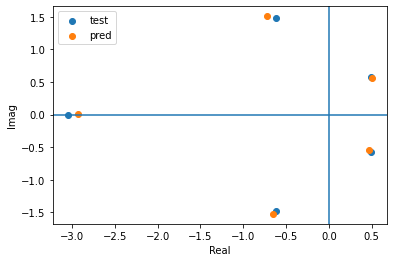

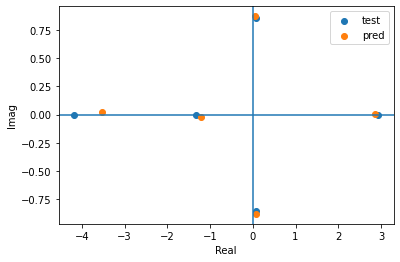

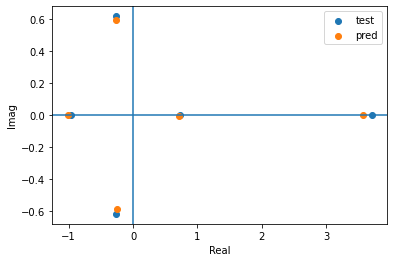

In [87]:
for i in range(3):
  index = random.randint(0, X_test.shape[0])

  test = y_test[index]
  pred = y_pred[index]

  test_real = test[::2]
  test_imag = test[1::2]

  pred_real = pred[::2]
  pred_imag = pred[1::2]

  plt.figure()
  plt.scatter(test_real, test_imag, label='test')
  plt.scatter(pred_real, pred_imag, label='pred')
  plt.legend()
  plt.xlabel('Real')
  plt.ylabel('Imag')
  plt.axhline(0)
  plt.axvline(0)

  print(f'Test nr: {i+1}')
  print(f'Test output:\t\t'
  f'{test_real[0]:.5f} + {test_imag[0]:.5f}; '
  f'{test_real[1]:.5f} + {test_imag[1]:.5f}; '
  f'{test_real[2]:.5f} + {test_imag[2]:.5f}; '
  f'{test_real[3]:.5f} + {test_imag[3]:.5f}; '
  f'{test_real[4]:.5f} + {test_imag[4]:.5f}')
  print(f'Predicted output:\t'
  f'{pred_real[0]:.5f} + {pred_imag[0]:.5f}; '
  f'{pred_real[1]:.5f} + {pred_imag[1]:.5f}; '
  f'{pred_real[2]:.5f} + {pred_imag[2]:.5f}; '
  f'{pred_real[3]:.5f} + {pred_imag[3]:.5f}; '
  f'{pred_real[4]:.5f} + {pred_imag[4]:.5f}\n')

In [68]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")


Saved model to disk


In [70]:
from google.colab import files

files.download("model.json")
files.download("model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>